# 🐞 Setup the Project

## 🖥️ Initialization

In [1]:
# prompt: mount drive and move the working directory to `./`

from google.colab import drive
drive.mount('/content/drive/')

# import os
%cd /content/drive/MyDrive/notebooks/dtsa-5509/final_project/

Mounted at /content/drive/
/content/drive/MyDrive/notebooks/dtsa-5509/final_project


In [2]:
from google.colab import userdata
import os
import json
# Get the API key from the Secrets Manager
kaggle_api_key = userdata.get('KAGGLE_API_KEY')

# Create the .kaggle directory and the kaggle.json file
!mkdir -p ~/.kaggle
!echo "$kaggle_api_key" > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls -l ~/.kaggle
# Now you can use Kaggle commands
# For example: !kaggle competitions download -c histopathologic-cancer-detection

# Assuming both secrets are available
kaggle_username = userdata.get("KAGGLE_USERNAME")  # You need to set this too
kaggle_key = userdata.get("KAGGLE_API_KEY")

# Double-check both are present
assert kaggle_username is not None, "Missing KAGGLE_USERNAME"
assert kaggle_key is not None, "Missing KAGGLE_API_KEY"

# Write the kaggle.json file
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump({"username": kaggle_username, "key": kaggle_key}, f)

os.chmod("/root/.kaggle/kaggle.json", 0o600)


# Write kaggle.json
kaggle_config = {
    "username": kaggle_username,
    "key": kaggle_key
}


total 4
-rw------- 1 root root 33 Jun 24 19:25 kaggle.json


## 🏹 Upload the Dataset

In [3]:
!pwd

/content/drive/MyDrive/notebooks/dtsa-5509/final_project


In [4]:
# # Download the Histopathologic Cancer Detection Competition stuff
# !kaggle competitions download -c microsoft-malware-prediction -p /content || echo "Failed"
# # Unzip it # I didn't use -q for quiet, because I don't trust computers.
# !mv /content/microsoft-malware-prediction.zip /content/drive/MyDrive/notebooks/dtsa-5511/final_project/data/
# !unzip ./data/train.zip -d ./data/
# !unzip ./data/test.zip -d ./data/
# !mv ./data/Test_data.csv ./data/test.csv
# !mv ./data/Train_data.csv ./data/train.csv
### That's a whole lot'a files...

## 📁 Load and Inspect the Data

In [5]:
# Required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import numpy as np
%matplotlib inline

### 📁 Load labels

In [6]:
test = pd.read_csv('./data/test.csv')
train = pd.read_csv('./data/train.csv')

# 🌠 Preliminary Data Visualization

| Feature                          | Description                                                                 | Dtype     |
|----------------------------------|-----------------------------------------------------------------------------|-----------|
| `duration`                       | Length (in seconds) of the connection                                      | int64     |
| `protocol_type`                 | Protocol used (e.g., TCP, UDP, ICMP)                                       | object    |
| `service`                        | Network service on the destination (e.g., http, telnet, smtp)             | object    |
| `flag`                           | Status flag of the connection (e.g., SF, S0)                              | object    |
| `src_bytes`                      | Number of data bytes from source to destination                           | int64     |
| `dst_bytes`                      | Number of data bytes from destination to source                           | int64     |
| `land`                           | 1 if source and destination IP addresses and ports are the same; 0 otherwise | int64  |
| `wrong_fragment`                 | Number of wrong fragments                                                  | int64     |
| `urgent`                         | Number of urgent packets                                                   | int64     |
| `hot`                            | Number of “hot” indicators (e.g., access to system files)                 | int64     |
| `num_failed_logins`             | Number of failed login attempts                                            | int64     |
| `logged_in`                      | 1 if successfully logged in; 0 otherwise                                   | int64     |
| `num_compromised`                | Number of compromised conditions                                          | int64     |
| `root_shell`                     | 1 if root shell is obtained; 0 otherwise                                   | int64     |
| `su_attempted`                   | 1 if “su root” command attempted; 0 otherwise                             | int64     |
| `num_root`                       | Number of “root” accesses                                                 | int64     |
| `num_file_creations`            | Number of file creation operations                                        | int64     |
| `num_shells`                     | Number of shell prompts invoked                                           | int64     |
| `num_access_files`              | Number of operations on access control files                              | int64     |
| `num_outbound_cmds`             | Number of outbound commands in an ftp session                             | int64     |
| `is_host_login`                  | 1 if the login belongs to the “host” list; 0 otherwise                    | int64     |
| `is_guest_login`                 | 1 if the login is a guest login; 0 otherwise                              | int64     |
| `count`                          | Number of connections to the same host as the current connection in the past 2 seconds | int64 |
| `srv_count`                      | Number of connections to the same service as the current connection in the past 2 seconds | int64 |
| `serror_rate`                   | % of connections that have “SYN” errors                                   | float64   |
| `srv_serror_rate`              | % of connections that have “SYN” errors to the same service               | float64   |
| `rerror_rate`                   | % of connections that have “REJ” errors                                   | float64   |
| `srv_rerror_rate`              | % of connections that have “REJ” errors to the same service               | float64   |
| `same_srv_rate`                | % of connections to the same service                                      | float64   |
| `diff_srv_rate`                | % of connections to different services                                    | float64   |
| `srv_diff_host_rate`          | % of connections to different hosts with the same service                 | float64   |
| `dst_host_count`                | Number of connections to the same destination host                        | int64     |
| `dst_host_srv_count`           | Number of connections to the same service on the destination host         | int64     |
| `dst_host_same_srv_rate`      | % of connections to the same service on the destination host              | float64   |
| `dst_host_diff_srv_rate`      | % of connections to different services on the destination host            | float64   |
| `dst_host_same_src_port_rate` | % of connections to the same port from the source                         | float64   |
| `dst_host_srv_diff_host_rate` | % of connections to different hosts using the same service                | float64   |
| `dst_host_serror_rate`        | % of connections to the destination host that have “SYN” errors           | float64   |
| `dst_host_srv_serror_rate`    | % of connections to the same service on the destination host with “SYN” errors | float64 |
| `dst_host_rerror_rate`        | % of connections to the destination host that have “REJ” errors           | float64   |
| `dst_host_srv_rerror_rate`    | % of connections to the same service on the destination host with “REJ” errors | float64 |
| `class`                         | Attack category or label (e.g., normal, DoS, probe)                        | object    |


## 👽 Load and Summarize

In [7]:
# Load the data
data = pd.read_csv('./data/train.csv')

print(data.shape)
data.describe()

(25192, 42)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 🧼 Clean the Dataset

In [8]:
# # Convert all object columns to strings
cols = ['protocol_type', 'service', 'flag', 'class']

data[cols] = data[cols].astype(str)

data = data.dropna()

# print((data['is_host_login'] == 1).count()) # 25192 empty, so I will drop
# Drop `is_host_login`

# Search for bad columns
constant_cols = [col for col in data.columns if data[col].nunique(dropna=False) == 1]
# print("Useless columns:", constant_cols)  Useless columns: ['num_outbound_cmds', 'is_host_login']
# "Let it all drop" - Modest Mouse
data = data.drop(columns=constant_cols)

# print(data.dtypes)

# Convert the label column
data['class'] = data['class'].map({'normal': 0, 'anomaly': 1})


# Get the binary columns for logistic regression
binary_cols = []

# Get the numeric clumns
numeric_cols = data.select_dtypes(include='number').columns

for col in data.select_dtypes(include='number').columns:
    unique_vals = sorted(data[col].dropna().unique())
    if unique_vals == [0, 1]:
        binary_cols.append(col)

# print("Binary columns:", binary_cols)
binary_cols.remove('num_shells')
# print(binary_cols)
# Separate the numeric and binary columns

numeric_cols = [col for col in numeric_cols if col not in binary_cols]

## 🥙 Investigating Low Variance Cells

In [9]:
# Fit the selector
selector = VarianceThreshold(threshold=0.001)
selector.fit(data[numeric_cols])  # call .fit() before accessing .variances_

# Now safe to access .variances_
low_variance = [col for col, var in zip(numeric_cols, selector.variances_) if var < 0.00001]

print("Low-variance features:\n" + "-" * 100)
print(low_variance)

if low_variance:
    print("-" * 100)
    print(data[low_variance].describe())
    print("-" * 100)
    print(data.groupby('class')[low_variance].mean())
else:
    print("No low-variance features found.")

Low-variance features:
----------------------------------------------------------------------------------------------------
[]
No low-variance features found.


In [10]:
# Drop these rows because they don't help
# data = data.drop(columns=low_variance) # I am going to keep them for the moment

## 🦉 Class Balances and Feature Distributions

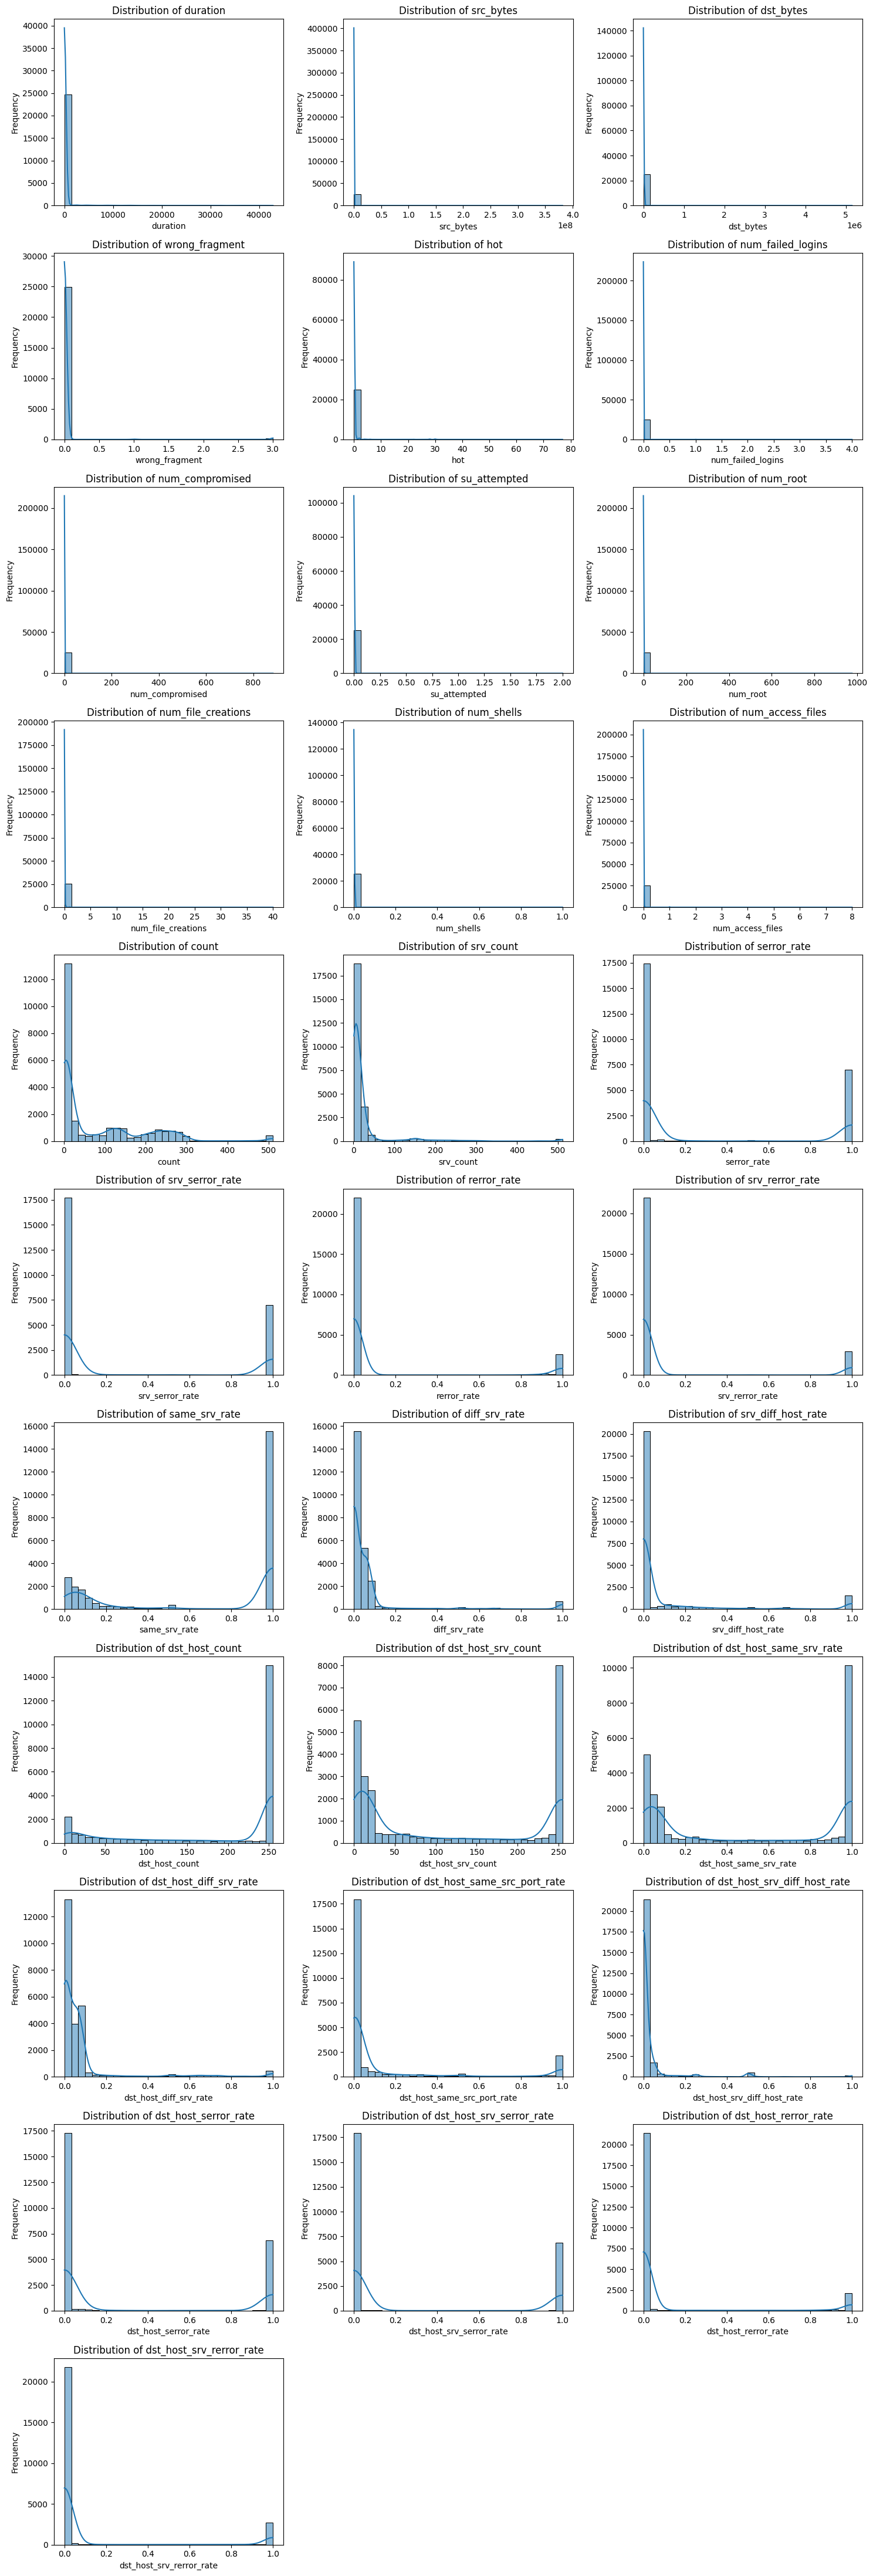

In [11]:
# Determine grid size (e.g., 3 columns)
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    values = data[col].to_numpy()  # ensure it's a NumPy array
    sns.histplot(values, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 🔥 Correlation Matrix

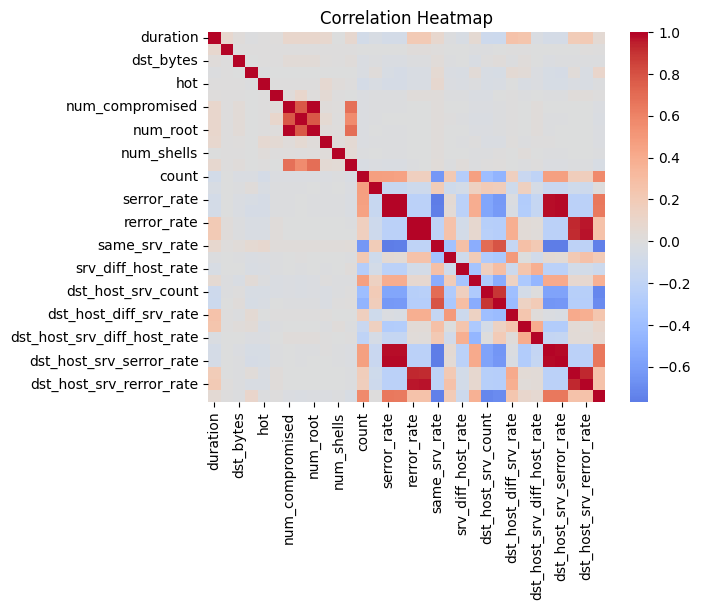

In [12]:
sns.heatmap(data[numeric_cols + ['class']].corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

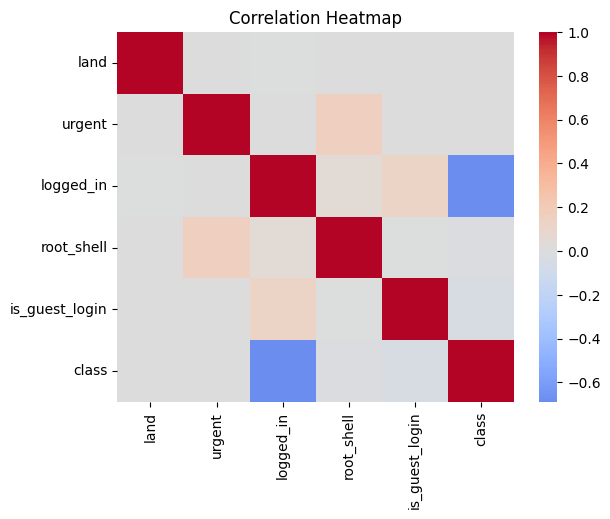

In [13]:
sns.heatmap(data[binary_cols].corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

## 📈 Numeric Distributions by Class

## 🥠 Protocol by Class

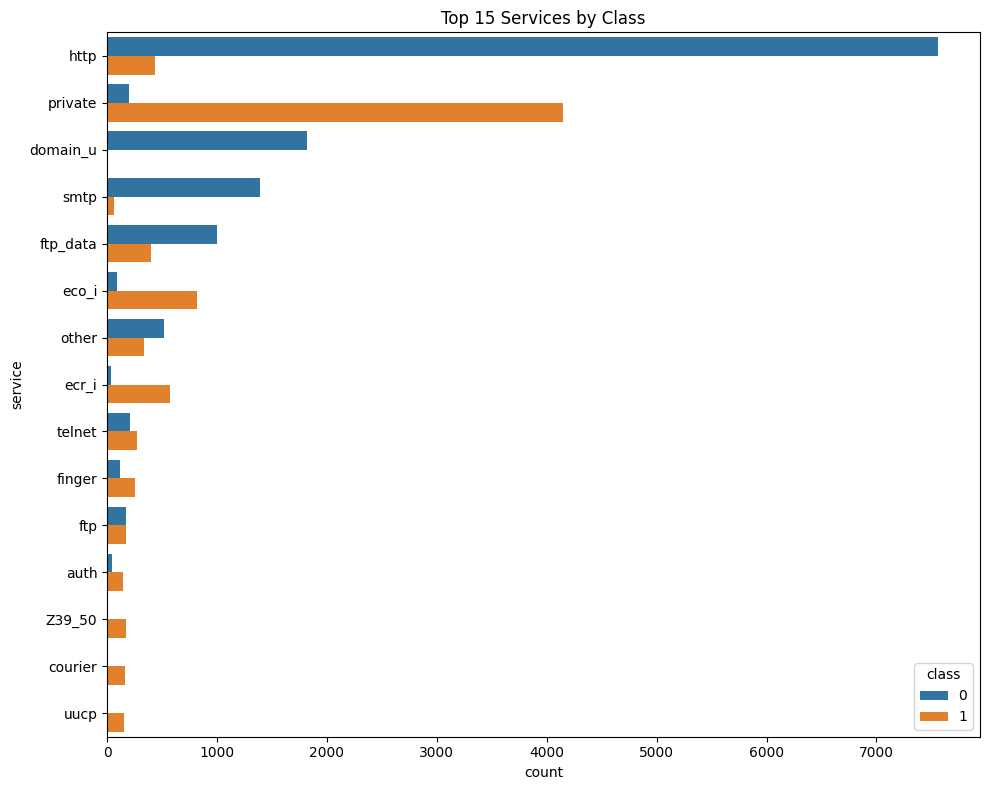

In [14]:
top_n = 15

# Filter out 'nan' (string) entries if present
svc_counts = data['service'][data['service'] != 'nan'].value_counts()
top_services = svc_counts.index[:top_n]

filtered_data = data[data['service'].isin(top_services)]

plt.figure(figsize=(10,8))
sns.countplot(data=filtered_data, y='service', hue='class', order=top_services)
plt.title(f"Top {top_n} Services by Class")
plt.tight_layout()
plt.show()


## 🕸 Radar Plot of the Features

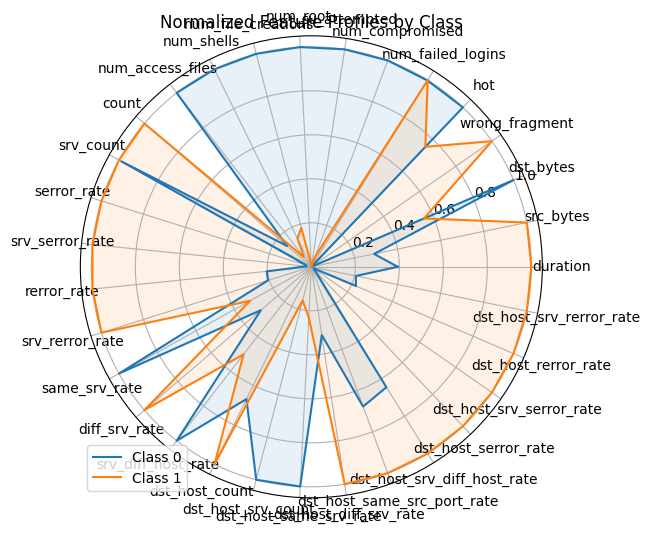

In [15]:
avg_features = data.groupby('class')[numeric_cols].mean()

avg_features = avg_features / avg_features.max()  # normalize for plot
# That does make the axes less meaningful, but hey... It's a visual.


labels = numeric_cols  # keep it small
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for cls in avg_features.index:
    values = avg_features.loc[cls, labels].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Class {cls}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.legend()
plt.title("Normalized Feature Profiles by Class")
plt.show()

## 🗺 t-SNE Scatter Plots

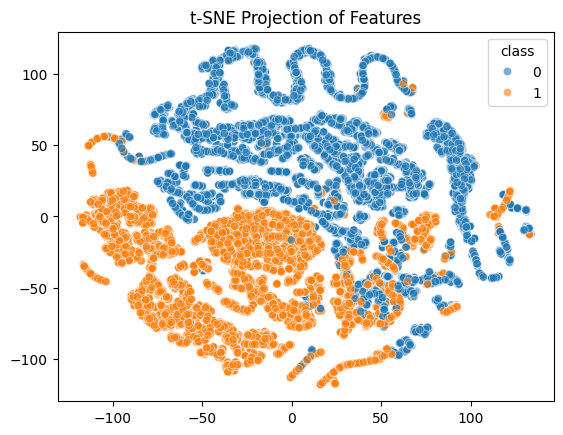

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,
            perplexity=30,
            random_state=42069 # Nice
            )
X_proj = tsne.fit_transform(data[numeric_cols])

sns.scatterplot(x=X_proj[:,0], y=X_proj[:,1], hue=data['class'], alpha=0.6)
plt.title("t-SNE Projection of Features")
plt.show()

In [17]:
# Save the t-SNE data

data_tsne = data.copy()
data_tsne['tsne_x'] = X_proj[:,0]
data_tsne['tsne_y'] = X_proj[:,1]

## 🚩 Check for Overlapping Points with K-Nearest Neighbours

In [18]:
from sklearn.neighbors import NearestNeighbors

X_embedded = data_tsne[['tsne_x', 'tsne_y']].values
knn = NearestNeighbors(n_neighbors=10).fit(X_embedded)
neighbors = knn.kneighbors(return_distance=False)

# Check how mixed the neighborhood is
overlap_flags = []
for i, inds in enumerate(neighbors):
    labels = data_tsne.iloc[inds]['class']
    purity = labels.value_counts(normalize=True).max()
    overlap_flags.append(purity < 0.8)  # low purity = likely overlap

data_tsne['overlap'] = overlap_flags
overlapping_samples = data_tsne[data_tsne['overlap']]


overlapping_samples.describe()
# [697 rows x 43 columns]
# So maybe I should train on these rows?

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,tsne_x,tsne_y
count,692.000000,692.000000,6.920000e+02,692.000000,692.000000,692.0,692.000000,692.000000,692.000000,692.000000,...,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,1818.578035,899.252890,5.236932e+04,0.002890,0.132948,0.0,0.030347,0.004335,0.148844,0.011561,...,0.216156,0.574205,0.078020,0.092832,0.069017,0.200896,0.186257,0.497110,19.247513,-34.085056
std,4117.149005,5083.084558,5.151802e+05,0.053721,0.584123,0.0,0.345244,0.065747,0.356192,0.214886,...,0.312336,0.430027,0.196456,0.271597,0.232903,0.379115,0.384999,0.500353,60.932735,50.563305
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-104.446617,-107.475273
25%,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.136376,-66.072380
50%,0.000000,30.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.040000,0.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.618599,-45.631090
75%,0.000000,246.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.500000,1.000000,0.030000,0.000000,0.000000,0.010000,0.000000,1.000000,58.893544,-7.501117
max,17419.000000,49640.000000,5.151385e+06,1.000000,3.000000,0.0,6.000000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.317268,90.198746


# 🔗 Linear Regression Model

## 🍧 Build the Linear Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = data[numeric_cols]
y = data['class']  # Tell me y, ain't nothin' but a heartbreak

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42069
                                                    ) # Nice

print(X)

       duration  src_bytes  dst_bytes  wrong_fragment  hot  num_failed_logins  \
0             0        491          0               0    0                  0   
1             0        146          0               0    0                  0   
2             0          0          0               0    0                  0   
3             0        232       8153               0    0                  0   
4             0        199        420               0    0                  0   
...         ...        ...        ...             ...  ...                ...   
25187         0          0          0               0    0                  0   
25188         0        334          0               0    0                  0   
25189         0          0          0               0    0                  0   
25190         0          0          0               0    0                  0   
25191         0          0          0               0    0                  0   

       num_compromised  su_

### 🚂 Train the Model

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 🐊 Evaluate the Model

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred_train = (model.predict(X_train) > 0.5).astype(int) # Because we're linear on a classification problem
y_pred_test = (model.predict(X_test) > 0.5).astype(int) # Because we're linear on a classification problem
# Look, it's not perfect, but I am trying to set a baseline...


# Evaluation
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Train RMSE:", mean_squared_error(y_train, y_pred_train))
print("Test RMSE:", mean_squared_error(y_test, y_pred_test))
print("-" * 100)
# For training data
print("Train classification report:")
print(classification_report(y_train, y_pred_train.round()))
print("-" * 100)
# For test data
print("Test classification report:")
print(classification_report(y_test, y_pred_test.round()))

Train R²: 0.7853787202690982
Test R²: 0.7690146303959049
Train RMSE: 0.053391554607254504
Test RMSE: 0.05755110140900972
----------------------------------------------------------------------------------------------------
Train classification report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10783
           1       0.95      0.94      0.94      9370

    accuracy                           0.95     20153
   macro avg       0.95      0.95      0.95     20153
weighted avg       0.95      0.95      0.95     20153

----------------------------------------------------------------------------------------------------
Test classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2666
           1       0.95      0.93      0.94      2373

    accuracy                           0.94      5039
   macro avg       0.94      0.94      0.94      5039
weighted avg       0.

### 🦖 Confusion Matrix

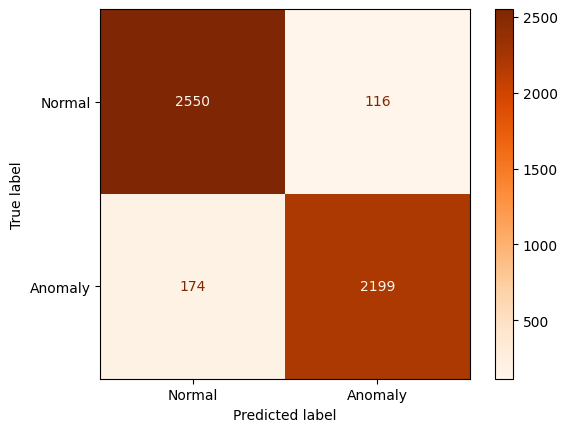

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Normal', 'Anomaly']
)

# Plot it
disp.plot(cmap='Oranges')

# 🪵 Logistic Regression

## 🪓 Build the Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = data[binary_cols].drop(columns = 'class') # Get out of here 'class'
y = data['class']  # Tell me y, ain't nothin' but a heartbreak

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069) # Nice

print(X)

       land  urgent  logged_in  root_shell  is_guest_login
0         0       0          0           0               0
1         0       0          0           0               0
2         0       0          0           0               0
3         0       0          1           0               0
4         0       0          1           0               0
...     ...     ...        ...         ...             ...
25187     0       0          0           0               0
25188     0       0          1           0               0
25189     0       0          0           0               0
25190     0       0          0           0               0
25191     0       0          0           0               0

[25192 rows x 5 columns]


### 🚂 Train the Model

In [24]:
model = LogisticRegression(class_weight='balanced') # Because my `rofp` is not great right now
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

## 🐊 Evaluate the Model

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, r2_score

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation
print("ROC AUC (Test):", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

print("-" * 100)
print("Train classification report:")
print(classification_report(y_train, y_pred_train))

print("-" * 100)
print("Test classification report:")
print(classification_report(y_test, y_pred_test))


ROC AUC (Test): 0.8344865925710252
----------------------------------------------------------------------------------------------------
Train classification report:
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     10783
           1       0.74      0.97      0.84      9370

    accuracy                           0.83     20153
   macro avg       0.85      0.84      0.83     20153
weighted avg       0.86      0.83      0.83     20153

----------------------------------------------------------------------------------------------------
Test classification report:
              precision    recall  f1-score   support

           0       0.95      0.70      0.81      2666
           1       0.74      0.96      0.84      2373

    accuracy                           0.82      5039
   macro avg       0.85      0.83      0.82      5039
weighted avg       0.85      0.82      0.82      5039



### 🦖 Confusion Matrix

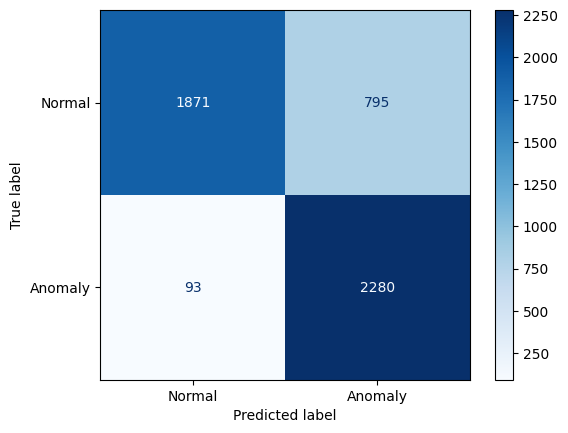

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Normal', 'Anomaly']
)

# Plot it
disp.plot(cmap='Blues')

## 🎼 Fine-Tune the Model

### 🔌 Adjust Decision Threshold

Text(0.5, 1.0, 'Precision vs. Recall')

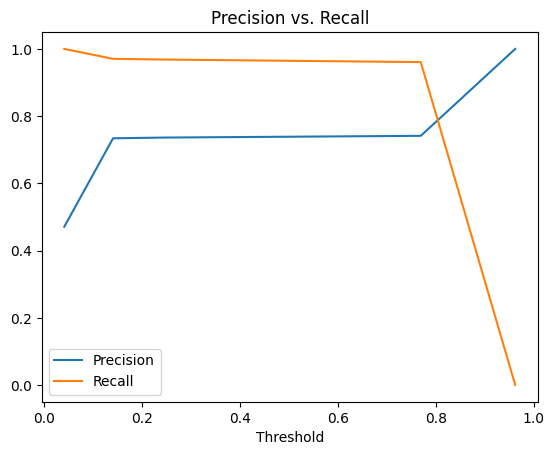

In [27]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
threshold = 0.6  # Start tuning this up from 0.5
y_pred_adjusted = (probs >= threshold).astype(int)

precision, recall, thresholds = precision_recall_curve(y_test, probs)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold"); plt.legend(); plt.title("Precision vs. Recall")

### 🍳 Compute F-Score per Threshold

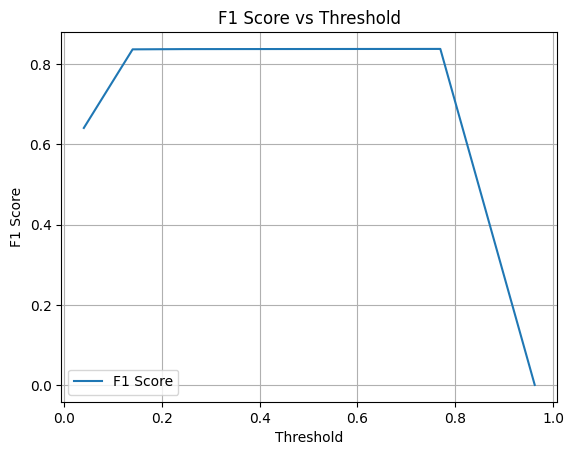

In [28]:
from sklearn.metrics import f1_score

f1_scores = [f1_score(y_test, (probs >= t).astype(int)) for t in thresholds]

plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

### 🦉 Adjust the Threshold Accordingly

In [29]:
import numpy as np

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best Threshold: {best_threshold:.3f}")
print(f"Best F1 Score: {best_f1:.3f}")

Best Threshold: 0.769
Best F1 Score: 0.837


In [30]:
y_pred_test_2 = (probs >= best_threshold).astype(int)

## 🐊 Re-Evaluate the Model

In [31]:
print("Classification report (optimal threshold):")
print(classification_report(y_test, y_pred_test_2))

Classification report (optimal threshold):
              precision    recall  f1-score   support

           0       0.95      0.70      0.81      2666
           1       0.74      0.96      0.84      2373

    accuracy                           0.82      5039
   macro avg       0.85      0.83      0.82      5039
weighted avg       0.85      0.82      0.82      5039



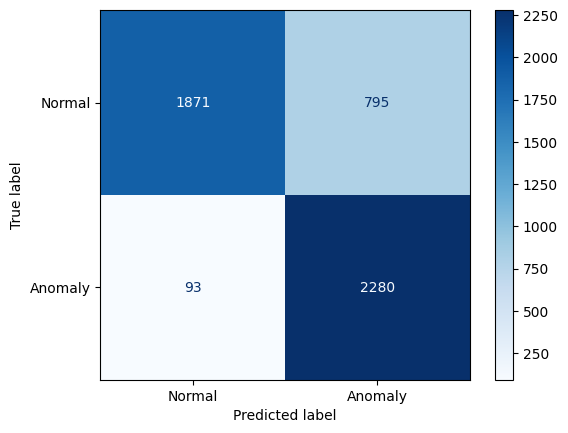

In [32]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test_2)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Normal', 'Anomaly']
)

# Plot it
disp.plot(cmap='Blues')

# 🫏 Multilinear Regression

## 🏇 Build the Multilinear Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = data[binary_cols].drop(columns = 'class') # Get out of here 'class'
y = data['class']  # Tell me y, ain't nothin' but a heartbreak

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069) # Nice

print(X)

       land  urgent  logged_in  root_shell  is_guest_login
0         0       0          0           0               0
1         0       0          0           0               0
2         0       0          0           0               0
3         0       0          1           0               0
4         0       0          1           0               0
...     ...     ...        ...         ...             ...
25187     0       0          0           0               0
25188     0       0          1           0               0
25189     0       0          0           0               0
25190     0       0          0           0               0
25191     0       0          0           0               0

[25192 rows x 5 columns]


### 🚂 Train the Model

In [34]:
import statsmodels.api as sm

# Example (assuming you've already cleaned the data and encoded class as 0/1)
X = data.drop(columns=['class', 'protocol_type', 'service', 'flag'])  # drop non-numeric or encoded separately
y = data['class']  # must be numeric if you're doing linear/logistic regression

X = sm.add_constant(X)  # Adds intercept
model = sm.OLS(y, X).fit()

## 🐊 Evaluate the Model

In [35]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     3065.
Date:                Tue, 24 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:27:22   Log-Likelihood:                 2982.4
No. Observations:               25192   AIC:                            -5891.
Df Residuals:                   25155   BIC:                            -5590.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## 🎼 Fine-Tune the Model

### 🌨️ Check for Mulit-Colinearity

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[numeric_cols]
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                        feature         VIF
0                         const   60.473650
1                      duration    1.316762
2                     src_bytes    1.011912
3                     dst_bytes    1.009451
4                wrong_fragment    1.092513
5                           hot    1.059526
6             num_failed_logins    1.029746
7               num_compromised  499.075786
8                  su_attempted    2.623790
9                      num_root  499.447263
10           num_file_creations    1.032912
11                   num_shells    1.007609
12             num_access_files    1.934906
13                        count    4.728432
14                    srv_count    3.182604
15                  serror_rate   97.727454
16              srv_serror_rate  113.498567
17                  rerror_rate   58.821646
18              srv_rerror_rate   61.785049
19                same_srv_rate   11.043345
20                diff_srv_rate    2.029816
21           srv_diff_host_rate 

### 🙊 Problematic Features

| Feature                    | VIF      | Issue                                  |
| -------------------------- | -------- | -------------------------------------- |
| `num_compromised`          | **499**  | Extreme multicollinearity              |
| `num_root`                 | **499**  | Almost identical to above              |
| `srv_serror_rate`          | **113**  | Strong overlap with `serror_rate` etc. |
| `serror_rate`              | **97.7** |                                        |
| `srv_rerror_rate`          | **61.8** |                                        |
| `rerror_rate`              | **58.8** |                                        |
| `dst_host_srv_serror_rate` | **57.4** |                                        |
| `dst_host_serror_rate`     | **41.5** |                                        |
| `dst_host_srv_rerror_rate` | **19.9** |                                        |
| `same_srv_rate`            | **11.0** |                                        |
| `dst_host_same_srv_rate`   | **11.3** |                                        |


### 🐪 Drop Redundant Features

In [37]:
def drop_high_vif(X, thresh=10.0):
    while True:
        vifs = pd.Series(
            [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
            index=X.columns
        )
        high_vif = vifs[vifs > thresh]
        if high_vif.empty:
            break
        drop_feature = high_vif.sort_values(ascending=False).index[0]
        print(f"Dropping '{drop_feature}' with VIF: {high_vif.iloc[0]:.2f}")
        X = X.drop(columns=[drop_feature])
    return X

X = drop_high_vif(X)

Dropping 'num_root' with VIF: 60.47
Dropping 'srv_serror_rate' with VIF: 60.46
Dropping 'const' with VIF: 60.44
Dropping 'srv_rerror_rate' with VIF: 42.94
Dropping 'dst_host_srv_serror_rate' with VIF: 42.74
Dropping 'dst_host_serror_rate' with VIF: 33.87
Dropping 'dst_host_same_srv_rate' with VIF: 19.42
Dropping 'rerror_rate' with VIF: 19.40


## 🐊 Re-Evaluate the Model

### 🍒 Run the Model Again

In [38]:
X = sm.add_constant(X)  # Add intercept if not already added
model_reduced = sm.OLS(y, X).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     4287.
Date:                Tue, 24 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:27:37   Log-Likelihood:                 2265.9
No. Observations:               25192   AIC:                            -4482.
Df Residuals:                   25167   BIC:                            -4278.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### 🗻 Double-Check for Colinearity

In [49]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data.sort_values("VIF", ascending=False))

def drop_high_vif(X, thresh=10.0):
    while True:
        vifs = pd.Series(
            [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
            index=X.columns
        )
        high_vif = vifs[vifs > thresh]
        if high_vif.empty:
            break
        drop_feature = high_vif.sort_values(ascending=False).index[0]
        print(f"Dropping '{drop_feature}' with VIF: {high_vif.iloc[0]:.2f}")
        X = X.drop(columns=[drop_feature])
    return X

X = drop_high_vif(X)

                        feature        VIF
0                         const  56.823224
15                same_srv_rate  10.196930
23         dst_host_rerror_rate   8.178714
24     dst_host_srv_rerror_rate   7.714054
14                  serror_rate   5.201728
12                        count   4.653580
7               num_compromised   3.228365
13                    srv_count   3.159355
19           dst_host_srv_count   3.015983
8                  su_attempted   2.594169
20       dst_host_diff_srv_rate   2.230586
16                diff_srv_rate   1.967493
18               dst_host_count   1.908828
11             num_access_files   1.892199
21  dst_host_same_src_port_rate   1.767550
22  dst_host_srv_diff_host_rate   1.536018
17           srv_diff_host_rate   1.299637
1                      duration   1.297894
4                wrong_fragment   1.062637
5                           hot   1.054539
9            num_file_creations   1.024873
6             num_failed_logins   1.023625
2          

# 🏁 Final Test for the My Favourite Model

## 🍞 Split the Train and Test Batches

In [40]:
from sklearn.model_selection import train_test_split

# X = X.drop(columns='const', errors='ignore')  # use the final feature set
y = data['class'].astype(int)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=4110114, # Not nice
    stratify=y
)

### 🐊 Evaluate

In [50]:
# Redefine X, drop high VIF features again (or reuse your previous result)
X = sm.add_constant(X)  # if you dropped 'const', add it back
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=4110114, # Boo! Hiss!
    stratify=y
)

# Refit the model on training data
model = sm.OLS(y_train, X_train).fit()

# Make sure to align test features to match the model
X_test = X_test[model.model.exog_names]

# Predict
y_pred_probs = model.predict(X_test)
y_pred_labels = (y_pred_probs >= 0.5).astype(int)


In [51]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     3238.
Date:                Tue, 24 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:20:50   Log-Likelihood:                 1755.4
No. Observations:               18894   AIC:                            -3461.
Df Residuals:                   18869   BIC:                            -3265.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Evaluation Metrics:")
print("Accuracy: ", accuracy_score(y_test, y_pred_labels))
print("Precision:", precision_score(y_test, y_pred_labels))
print("Recall:   ", recall_score(y_test, y_pred_labels))
print("F1 Score: ", f1_score(y_test, y_pred_labels))

Evaluation Metrics:
Accuracy:  0.9428389965068276
Precision: 0.9481558803061935
Recall:    0.928133514986376
F1 Score:  0.9380378657487092


# 🧾 Conclusion

In this project I explored the detection of malicious network activity using a combination of linear, logistic, and multilinear regression techniques. I began with a structured data exploration process to understand feature distributions, class imbalance, and relationships among variables.

Then I implemented several modeling approaches:

- **🔗 Linear Regression** offered a baseline understanding but lacked precision for classification tasks.
- **🪵 Logistic Regression** improved significantly in capturing class separation, especially after decision threshold optimization.
- **🫏 Multilinear Regression** used forward feature selection and multicollinearity and gave the most interpretable model.

After several refinement cycles—eliminating low-variance and redundant features, adjusting thresholds, and revalidating model assumptions—we arrived at a final model.

## 🧠 Lessons Learned

Throughout this project, I encountered several challenges that required so much troubleshooting that it was hard to focus on the machine learning process:

- Managing missing values, inconsistent types, and unexpected formats (e.g., strings in numeric columns) was more time-consuming than expected. Cleaning was not just a preprocessing step—it shaped how well the models could learn.

- Iterating on models in a Jupyter notebook introduced issues with variable state, outdated cells, and version mismatches. I moved between 2 different computers and Jupyter notebooks and Google Colab. Everything was out of sync and the dataset required cleaning and parsing too many times to count.

- Concepts like multicollinearity, decision boundaries, and statistical significance are clear in theory—but messy in practice. Applying them required a lot of trial, error, and rereading documentation and course materials.

- Libraries like `statsmodels` and `sklearn` are powerful, but choosing the hardware was a major weakness in my work.

This project pushed me to actively problem-solve. It gave me a much deeper appreciation for the real-world messiness of data science. I intend to never try modelling on rural internet and a computer from 2005 -- never, ever, ever again.
